<a href="https://colab.research.google.com/github/munera72/AI-Kaggle-Project/blob/main/01%20-%20exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01.01 - PROYECTO KAGGLE

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


## download data directly from Kaggle

- create a file `kaggle.json` with your authentication token (in kaggle $\to$ click user icon on top-right $\to$ settings $\to$ API create new token)
- upload it to this notebook workspace
- run the following cell

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

 25% 5.00M/20.1M [00:00<00:00, 39.3MB/s]
100% 20.1M/20.1M [00:00<00:00, 108MB/s] 


## unzip and inspect data

In [ ]:
!unzip udea*.zip > /dev/null

In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


## load `train.csv` data with pandas



In [ ]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 12)


In [ ]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


## Primer análisis

Se toman las columnas FAMI_ESTRATOVIVIENDA y ESTU_HORASSEMANATRABAJA para analizarlas

In [ ]:
z = z[['FAMI_ESTRATOVIVIENDA', 'ESTU_HORASSEMANATRABAJA', 'RENDIMIENTO_GLOBAL', 'FAMI_TIENEINTERNET', 'ESTU_PRGM_DEPARTAMENTO']]
z.head()

,FAMI_ESTRATOVIVIENDA,ESTU_HORASSEMANATRABAJA,RENDIMIENTO_GLOBAL,FAMI_TIENEINTERNET,ESTU_PRGM_DEPARTAMENTO
0,Estrato 3,Menos de 10 horas,medio-alto,Si,BOGOTÁ
1,Estrato 3,0,bajo,No,ATLANTICO
2,Estrato 3,Más de 30 horas,bajo,Si,BOGOTÁ
3,Estrato 4,0,alto,Si,SANTANDER
4,Estrato 3,Entre 21 y 30 horas,medio-bajo,Si,ANTIOQUIA


<Axes: xlabel='FAMI_ESTRATOVIVIENDA'>

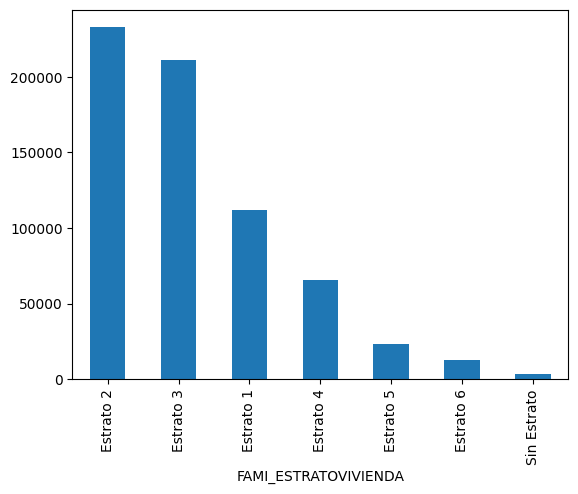

In [ ]:
z.FAMI_ESTRATOVIVIENDA.value_counts().plot(kind='bar')


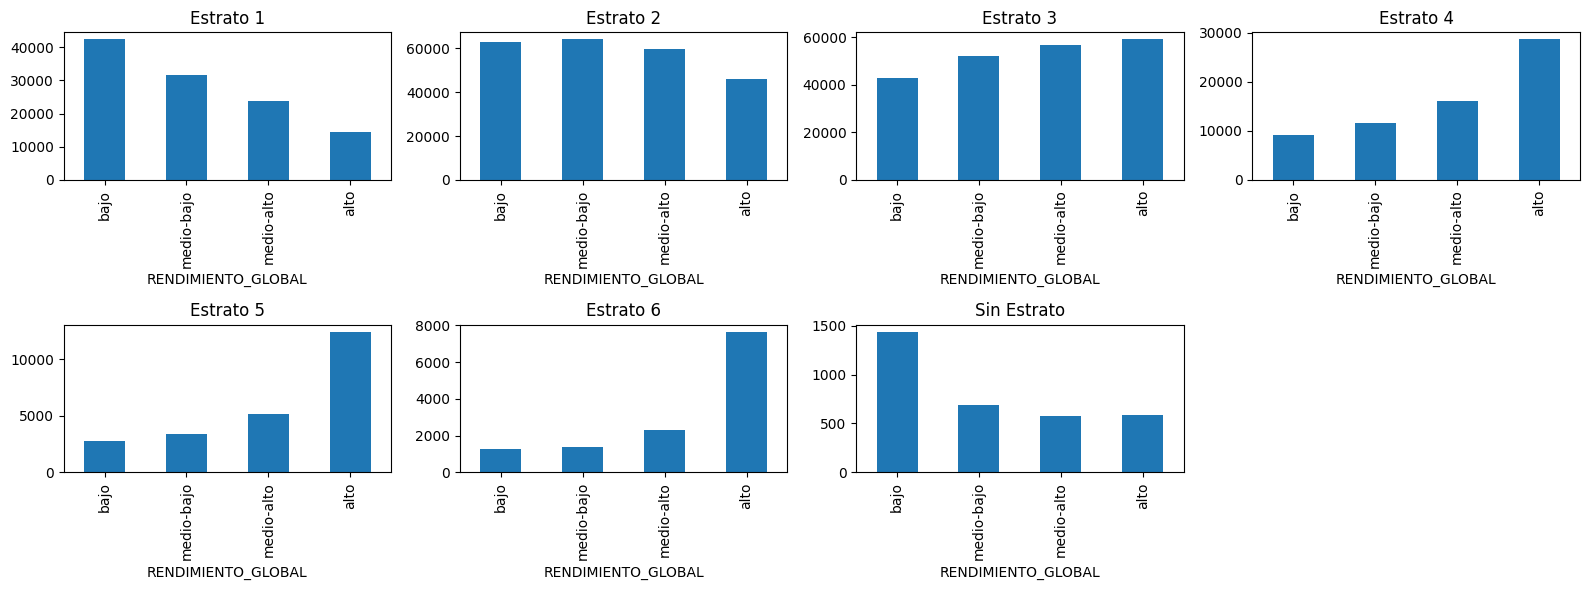

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.FAMI_ESTRATOVIVIENDA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.FAMI_ESTRATOVIVIENDA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

<Axes: xlabel='ESTU_HORASSEMANATRABAJA'>

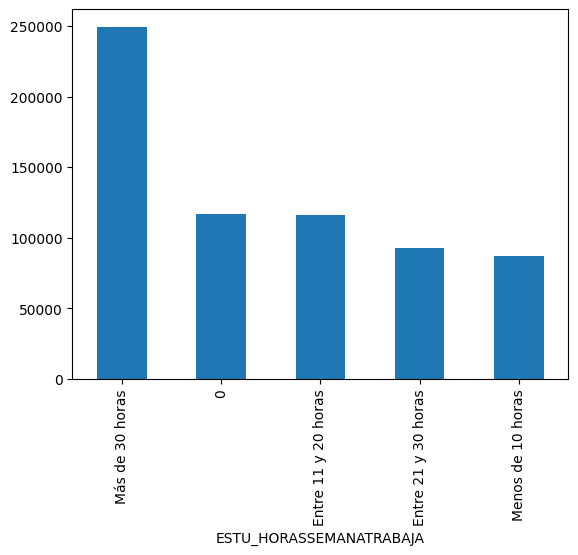

In [ ]:
z.ESTU_HORASSEMANATRABAJA.value_counts().plot(kind='bar')

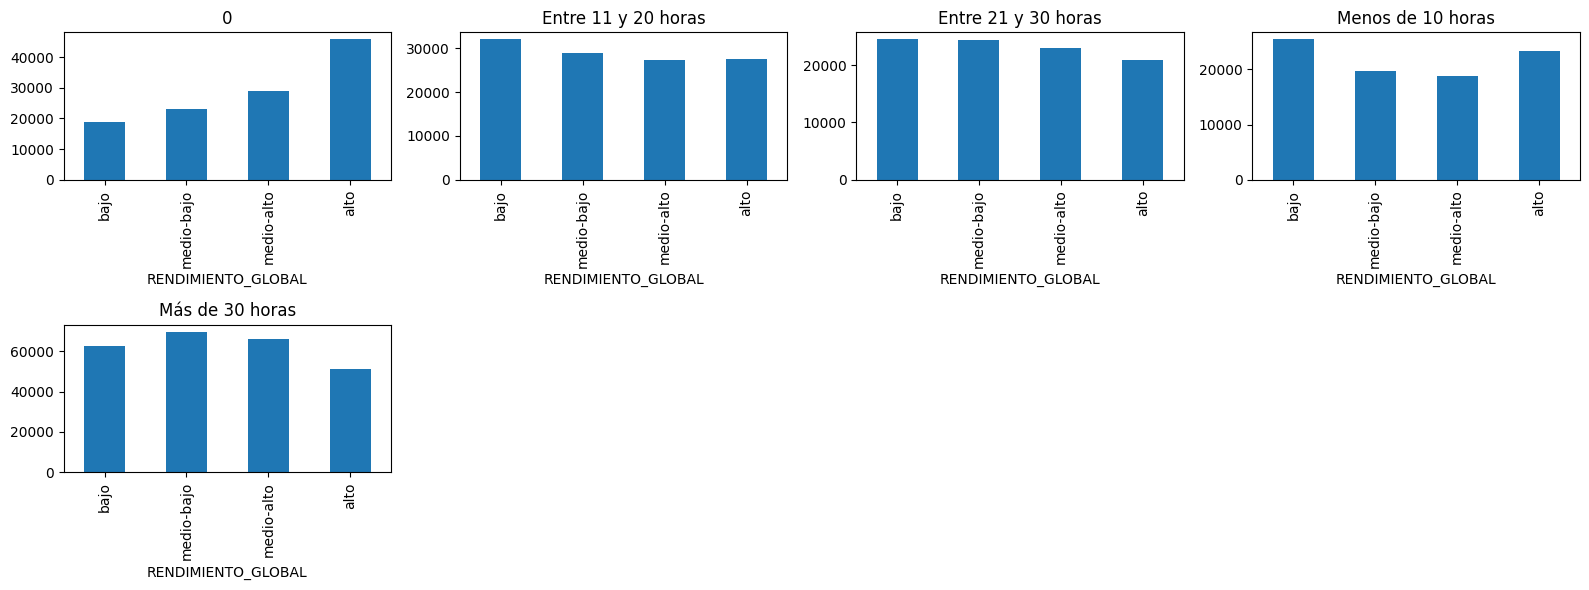

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.ESTU_HORASSEMANATRABAJA.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_HORASSEMANATRABAJA==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

## Segundo análisis

Se toman las columnas FAMI_TIENEINTERNET y ESTU_PRGM_DEPARTAMENTO para analizarlas

<Axes: xlabel='FAMI_TIENEINTERNET'>

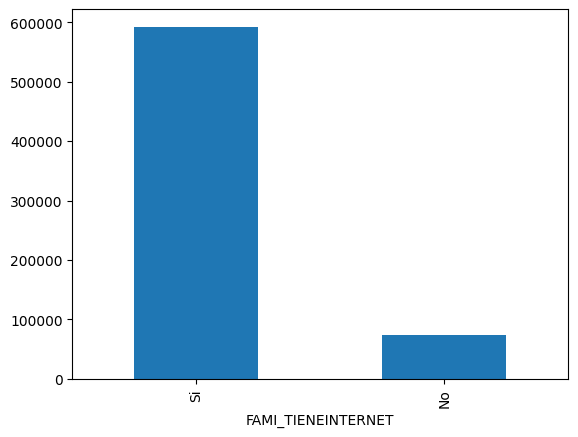

In [ ]:
z.FAMI_TIENEINTERNET.value_counts().plot(kind='bar')

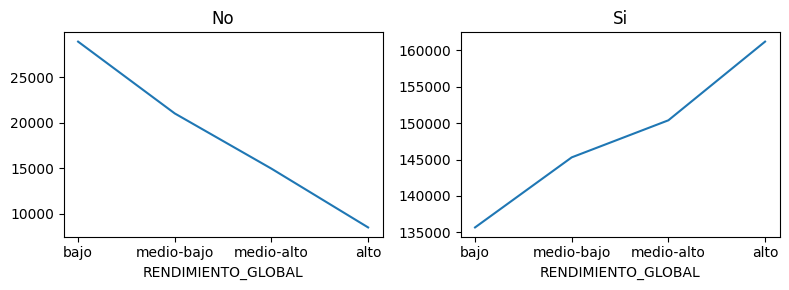

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.FAMI_TIENEINTERNET.value_counts().index)
for ax,ci in subplots(c, n_cols=2, usizex=4):
    zc = z[z.FAMI_TIENEINTERNET==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='line')
    plt.title(ci)

<Axes: xlabel='ESTU_PRGM_DEPARTAMENTO'>

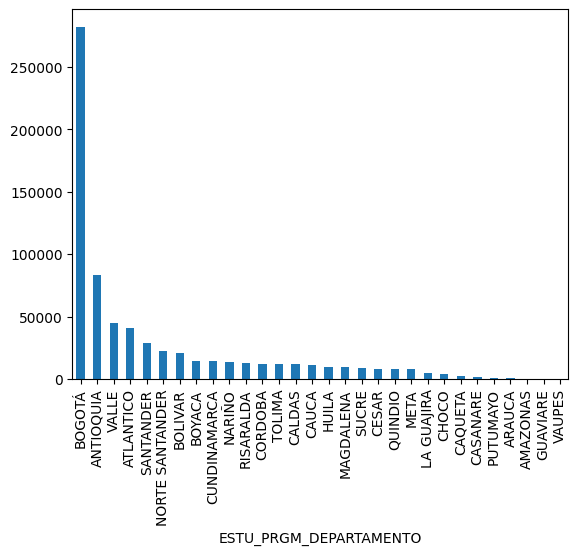

In [ ]:
z.ESTU_PRGM_DEPARTAMENTO.value_counts()[:-1].plot(kind='bar')

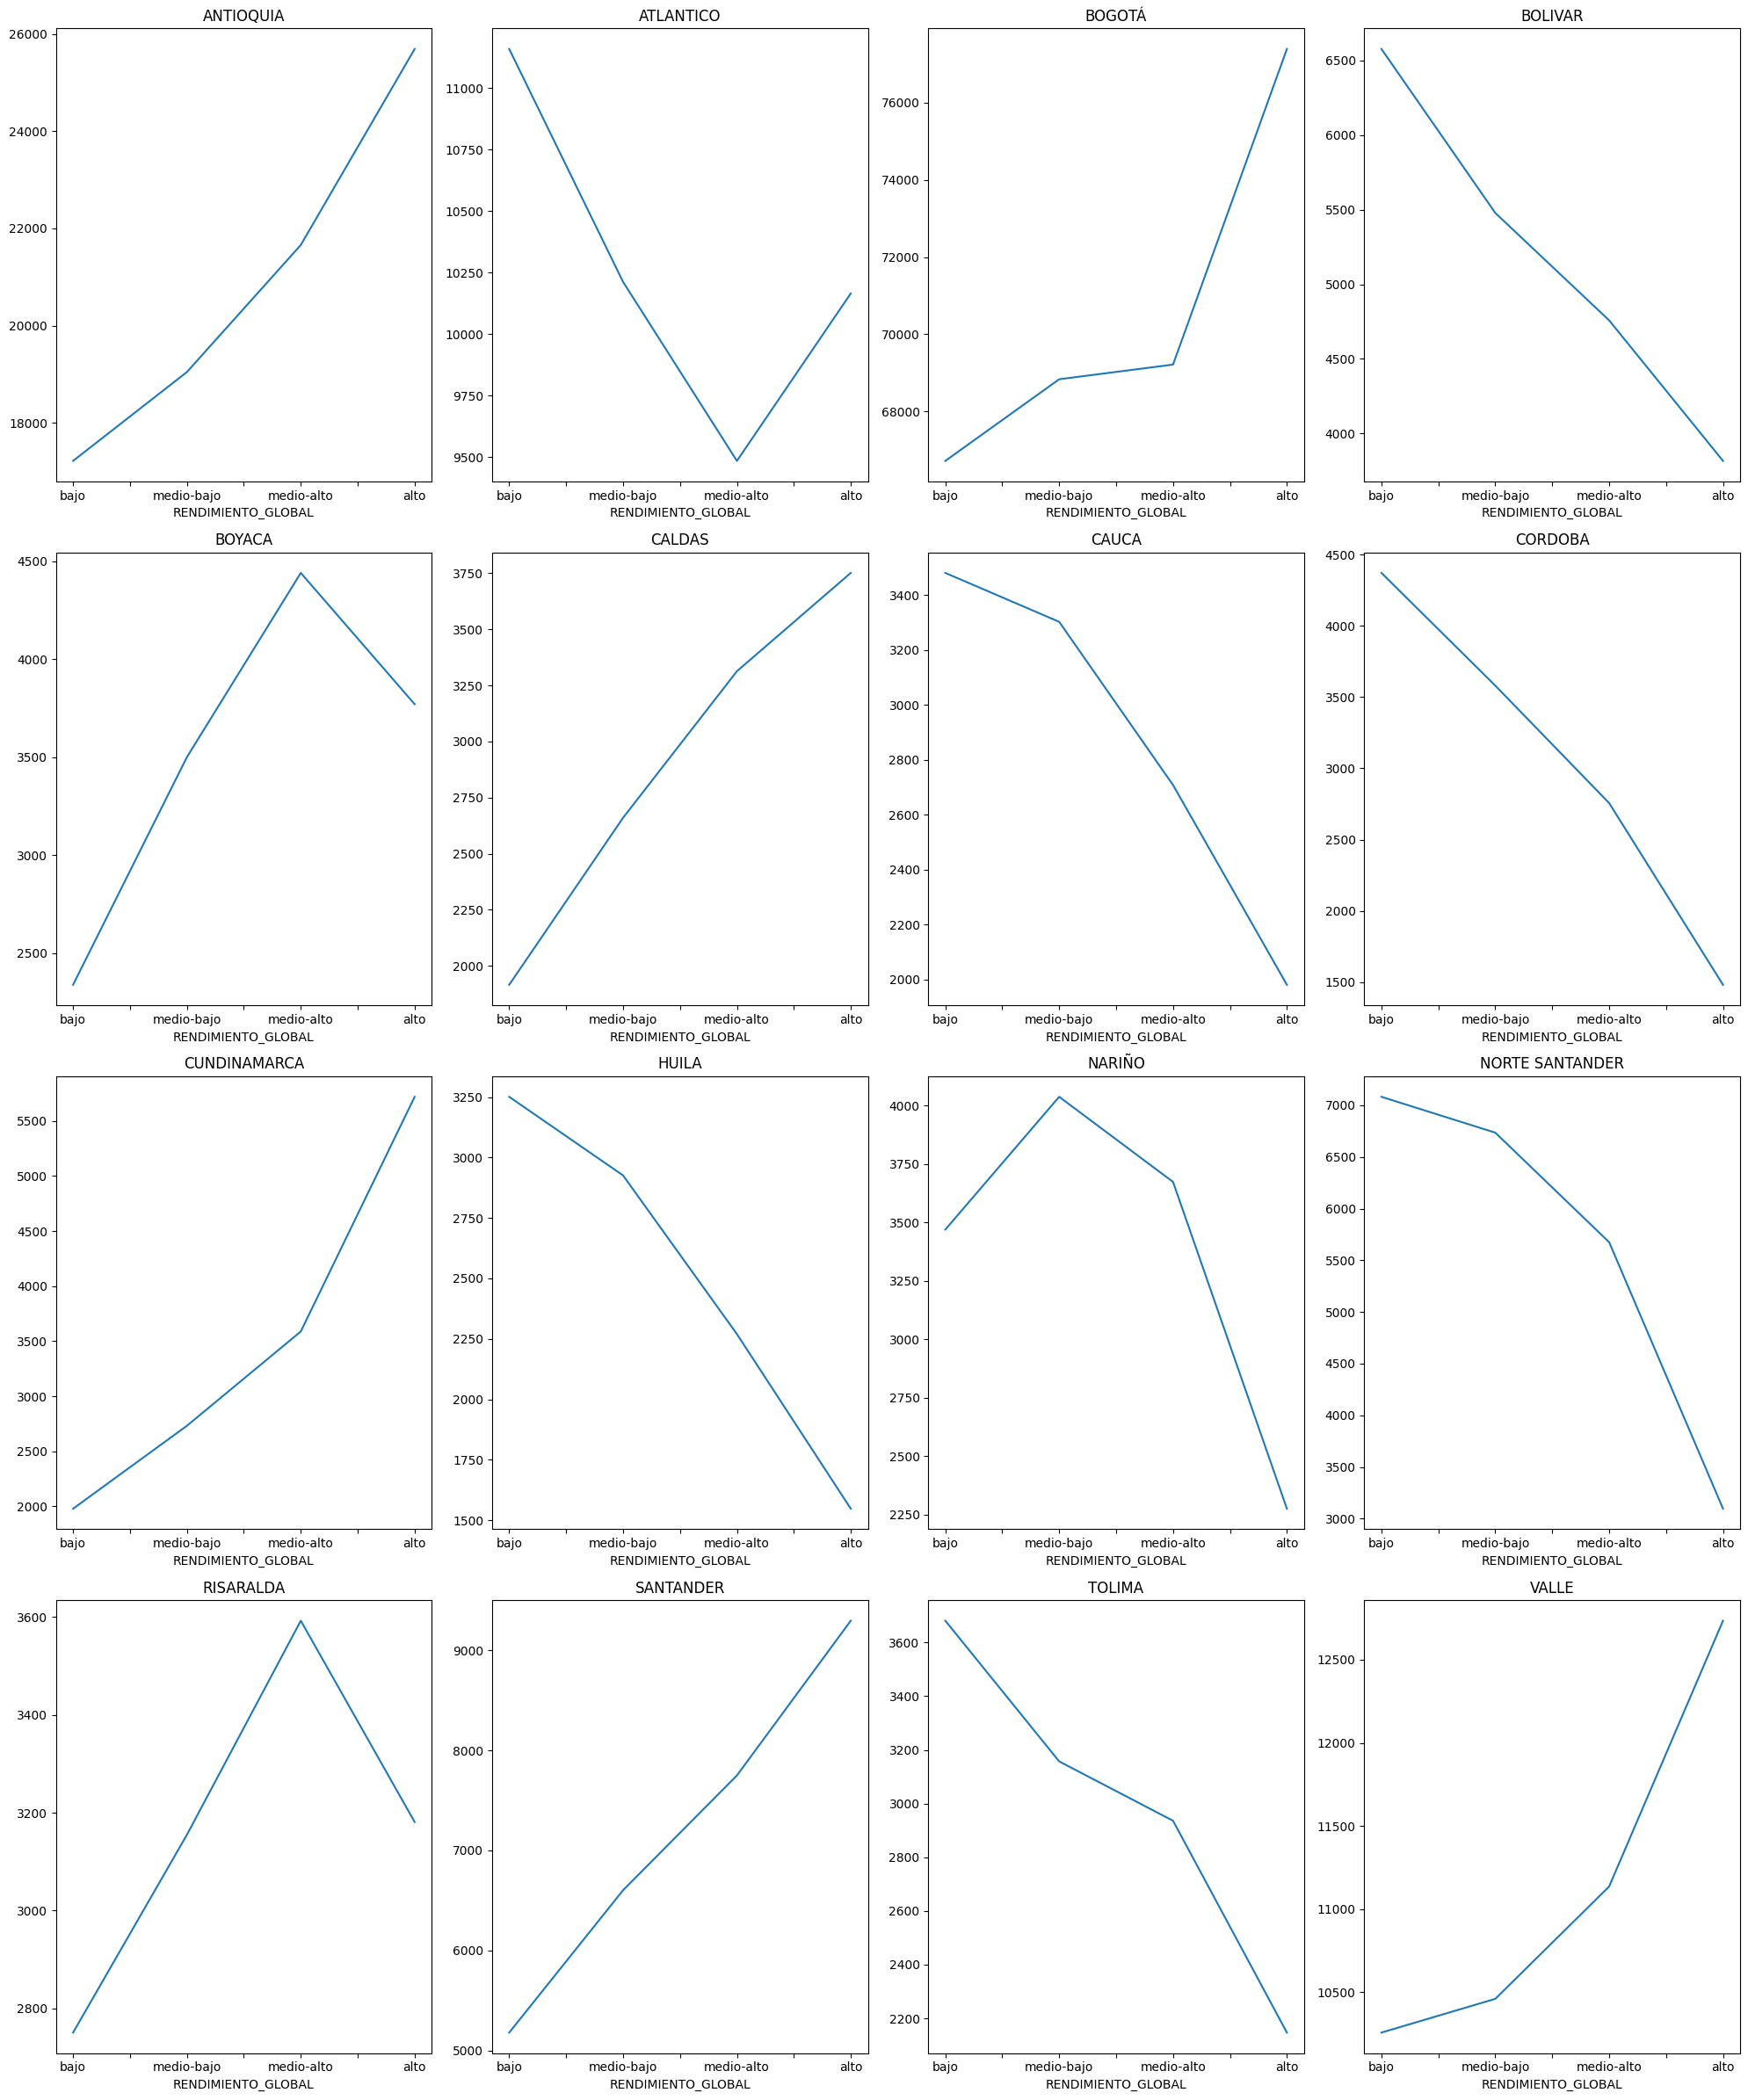

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.ESTU_PRGM_DEPARTAMENTO.value_counts()[:16].index)
for ax,ci in subplots(c, n_cols=4, usizex=5, usizey=6):
    zc = z[z.ESTU_PRGM_DEPARTAMENTO==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='line')
    plt.title(ci)

KeyError: "['alto'] not in index"

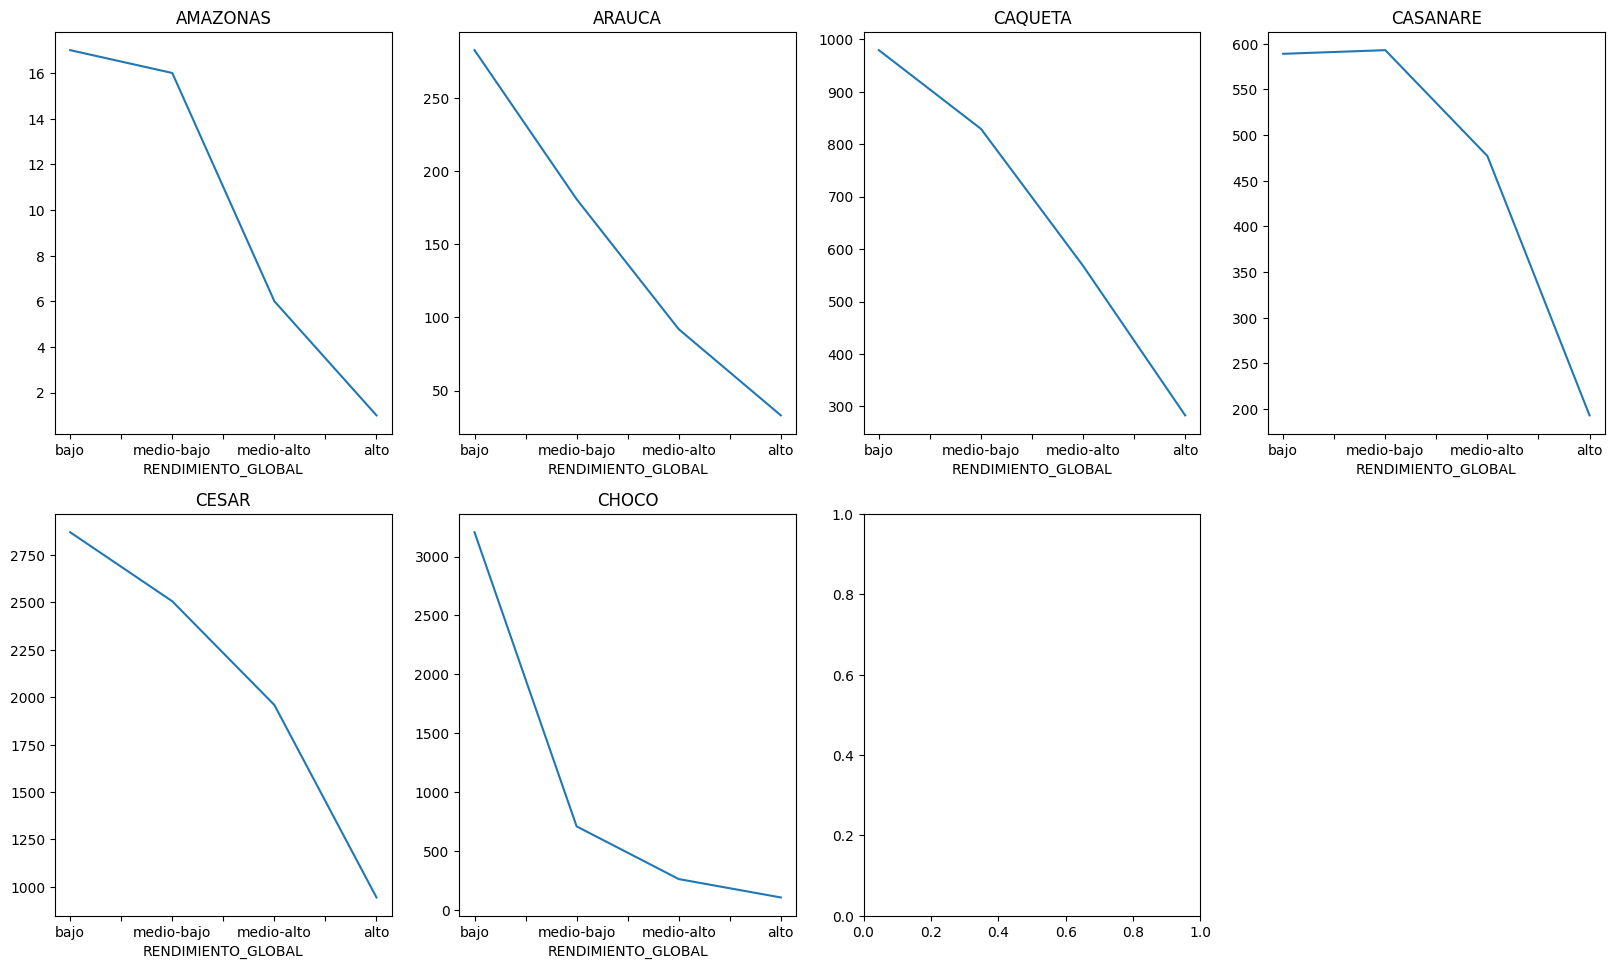

In [ ]:
from rlxutils import subplots
import matplotlib.pyplot as plt

c = sorted(z.ESTU_PRGM_DEPARTAMENTO.value_counts()[16:].index)
for ax,ci in subplots(c, n_cols=4, usizex=5, usizey=6):
    zc = z[z.ESTU_PRGM_DEPARTAMENTO==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='line')
    plt.title(ci)


#Este error se da porque no hay resultados que registren alto o medio-alto en algunos departamentos, por lo que no se ubica en el índice.